# Project One

# Factors Encouraging Fast Food Restaurants to Enter the Market

## 1.1 Introduction



Fast foods composed a large portion of our daily meals. People choose them because of their convenience, cheap price, and tasty flavor, while they also reject these “junk food” due to the high calories.

The main dataset contains information about 10000 fast-food restaurants across America. It includes the fast-food restaurants’ names, categories, detailed addresses that contain the street name, city, province, longitude, and altitude, and their websites. The table also recorded the date the fast-food restaurant was added to the dataset, which shows that more and more restaurants were built across America. Restaurants will only enter the market when they can receive profits from doing so, and this project will investigate multiple factors that may contribute to the profit. 

In my project, the independent variables are the population, population density, the real income of citizens, and the number and brands of existing restaurants in the city. The analysis will be aiming at how these factors affect the number of fast-food restaurants in each city. The main dataset can be found on Datafiniti, and I cite the data from Kaggle https://www.kaggle.com/datasets/datafiniti/fast-food-restaurants?select=Datafiniti_Fast_Food_Restaurants_May19.csv. The data about population, population density, and real income are imported from Simplemap https://simplemaps.com/data/us-cities.

My investigations showed that among the five factors listed, four of them demonstrated a rather clear relationship with the number of restaurants in a certain region. Some results are in accordance with the hypothesis: regions with lower average income and higher populations have more fast-food restaurants. Population density shows no clear relationship with the restaurant number. Opposite to my hypothesis, data shows that fast-food restaurants prefer cities already occupied by many competitors, especially those has more famous ones.

## 1.2 Data Cleaning

Firstly, import the numpy and pandas, read the dataset as a Dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt

fastfood_data = pd.read_csv('Datafiniti_Fast_Food_Restaurants.csv')
print("Top 10 rows:")
fastfood_data.head(10)

Top 10 rows:


,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...
5,AVwc57jLkufWRAb50ROs,2015-10-23T23:59:49Z,2018-06-26T02:59:43Z,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,us/mi/detroit/9768grandriverave/-791445730,42.368823,-83.138251,Wendy's,48204,MI,https://foursquare.com/v/wendys/4bfec191e584c9...,http://www.wendys.com
6,AVwc81QgkufWRAb50vnI,2015-09-21T07:47:08Z,2018-06-26T02:59:43Z,13600 W McNichols Rd,Fast Food Restaurant,Detroit,US,us/mi/detroit/13600wmcnicholsrd/-2061630068,42.416819,-83.180444,Burger King,48235,MI,https://foursquare.com/v/burger-king/4bab7981f...,"http://bk.com,http://www.bk.com"
7,AVwdVafPByjofQCxoA6y,2016-06-06T16:15:08Z,2018-06-26T02:59:41Z,4111 Oceanside Blvd,Fast Food,Oceanside,US,us/ca/oceanside/4111oceansideblvd/1143321601,33.205722,-117.288645,Chipotle Mexican Grill,92056,CA,https://www.trip.com/oceanside-ca/restaurants/...,"http://www.chipotle.com,http://www.lasalsa.com"
8,AVwc4JQKIN2L1WUfp3hU,2016-12-13T12:34:52Z,2018-06-26T02:59:32Z,162 Old Country Rd,Fast Food Restaurants,Riverhead,US,us/ny/riverhead/162oldcountryrd/267504952,40.937359,-72.650142,7-Eleven,11901,NY,http://www.local.com/business/details/yx/river...,"http://www.7-eleven.com/?yext=39326,http://www..."
9,AVwdhkOGByjofQCxp9qV,2016-04-16T16:20:41Z,2018-06-25T12:05:40Z,1407 S Stockton Ave,Fast Food Restaurant,Monahans,US,us/tx/monahans/1407sstocktonave/-1721138121,31.580721,-102.891455,Dairy Queen,79756,TX,https://foursquare.com/v/dairy-queen/4bd4fd7b6...,"http://www.dairyqueen.com,http://api.citygridm..."


Check whether there is any data missing:

In [2]:
fastfood_data.isnull().sum()

id             0
dateAdded      0
dateUpdated    0
address        0
categories     0
city           0
country        0
keys           0
latitude       0
longitude      0
name           0
postalCode     0
province       0
sourceURLs     0
websites       0
dtype: int64

The names of restaurants in this dataset have some errors, for example, there exist "McDonald's" and "McDonalds" represent the same brand but are not counted together.

In [3]:
fastfood_data.name.value_counts()[0:10]

McDonald's         1898
Taco Bell          1032
Burger King         833
Subway              776
Arby's              663
Wendy's             628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Domino's Pizza      215
Name: name, dtype: int64

In [4]:
import string

fastfood_data.name=fastfood_data.name.apply(lambda a:''.join([i for i in a 
                            if i not in string.punctuation]))

fastfood_data.name.value_counts()[:10]

McDonalds          1940
Taco Bell          1032
Burger King         833
Subway              776
Arbys               666
Wendys              628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Dominos Pizza       215
Name: name, dtype: int64

Convert the date object into a more readable form.

In [5]:
from datetime import datetime
from dateutil.parser import parse

In [6]:
fastfood_data['dateAdded'] = fastfood_data['dateAdded'].apply(
        lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

print(fastfood_data['dateAdded'].head())

0   2015-10-19 23:47:58
1   2015-10-19 23:47:58
2   2016-03-29 05:06:36
3   2017-01-03 07:46:11
4   2018-06-26 02:59:43
Name: dateAdded, dtype: datetime64[ns]


Import the population and income data.

In [7]:
pop_data = pd.read_csv('uscities.csv')
print("Top 10 rows:")
pop_data.head(10)

Top 10 rows:


,city,province,lat,lng,population,population_proper,density,income_household_median
0,New York,NY,40.6943,-73.9249,18972871.0,8736047.0,10768.2,70663.0
1,Los Angeles,CA,34.1141,-118.4068,12121244.0,3902440.0,3267.6,69778.0
2,Chicago,IL,41.8375,-87.6866,8595181.0,2742119.0,4576.6,65781.0
3,Miami,FL,25.7840,-80.2101,5711945.0,440807.0,4945.7,47860.0
4,Dallas,TX,32.7935,-96.7667,5668165.0,1300239.0,1522.2,58231.0
5,Houston,TX,29.7860,-95.3885,5650910.0,2293288.0,1394.6,56019.0
6,Philadelphia,PA,40.0077,-75.1339,5512873.0,1596865.0,4544.9,52649.0
7,Atlanta,GA,33.7628,-84.4220,5046555.0,492204.0,1419.9,69164.0
8,Washington,DC,38.9047,-77.0163,4810669.0,683154.0,4434.0,93547.0
9,Boston,MA,42.3188,-71.0852,4208580.0,672814.0,5505.8,81744.0


Check whether there is data missing:

In [8]:
pop_data.isnull().sum()

city                           0
province                       0
lat                            0
lng                            0
population                 74240
population_proper          74240
density                        0
income_household_median    77708
dtype: int64

Remove the rows with null data:

In [9]:
pop_data = pop_data.dropna()
pop_data.isnull().sum()

city                       0
province                   0
lat                        0
lng                        0
population                 0
population_proper          0
density                    0
income_household_median    0
dtype: int64

## 1.3 Summary Statistics Tables

In the graph analysis part of this project, only the date added, city name, and the restaurant name are required.

In [10]:
fastfood_data1 = fastfood_data.drop(fastfood_data.columns[[0, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14]], axis=1)
fastfood_data1.head(10)

,dateAdded,city,name
0,2015-10-19 23:47:58,Thibodaux,SONIC Drive In
1,2015-10-19 23:47:58,Thibodaux,SONIC Drive In
2,2016-03-29 05:06:36,Pigeon Forge,Taco Bell
3,2017-01-03 07:46:11,Pigeon Forge,Arbys
4,2018-06-26 02:59:43,Morrow,Steak n Shake
5,2015-10-23 23:59:49,Detroit,Wendys
6,2015-09-21 07:47:08,Detroit,Burger King
7,2016-06-06 16:15:08,Oceanside,Chipotle Mexican Grill
8,2016-12-13 12:34:52,Riverhead,7Eleven
9,2016-04-16 16:20:41,Monahans,Dairy Queen


Then count the number of restaurants in the same city.

In [11]:
cityList = fastfood_data1.city.value_counts()
print('The number of cities in the list is:')
print(cityList.shape[0])

The number of cities in the list is:
2764


Restructure the data to a dataframe and set city name as index.

In [12]:
city_data = cityList.to_frame()
city_data = city_data.reset_index()
city_data = city_data.rename(columns = {"index": "city", "city": "number_of_restaurants"})
city_data = city_data.set_index("city")
city_data.head(10)

,number_of_restaurants
city,
Houston,107
Las Vegas,82
Phoenix,78
Columbus,72
Dallas,66
Orlando,65
Los Angeles,64
Miami,62
Chicago,57


This city_data table uses city names as indices and stores the corresponding number of restaurants in each city. The restaurant number is the dependent variable in my research, and my goal is to reveal which factors affect this variable. This table is created to merge with tables that store the independent variables, so that it is convenient to draw graphs that demonstrate relationships among them.

In my hypothesis, three of the factors are income, population, and population density.

Fast food is constantly being criticized due to its unhealthiness. Although it’s delicious, cheap, and rather convenient considering the rapid pace of life, it substantially contains many calories, and having too much of it will lead to obesity and other syndromes. Normally speaking, fast food is regarded as an inferior good, for which people buy less as their income increases and start to care more about the life quality. It is reasonable to assume that cities with lower real household incomes are relatively attractive for fast food restaurants. In my project, I chose to use the median value to represent the income level of a city, in order to avoid the extremely rich and extremely poor cases. 

A high total population usually means high demand for everything, including fast food. It is reasonable to deduce that more restaurants will appear in the rather populated cities. Here incurs a question: which one has a larger impact, population or population density? For cities with high population density, the pace of life is usually more rapid and the life quality is generally lower. Is it possible that these regions combine the two features mentioned above, and population density is more relevant to the population density?

To testify my hypothesis, I created the population_by_city table, which contains the corresponding population, population density, and median household income of each city in the United States. Additionally, to avoid the effects of population in the analysis of income, I choose to find the relationship between median income and the number of fast-food restaurants per person in each city.

In [13]:
population_by_city = pop_data.drop(pop_data.columns[[1, 2, 3, 5]], axis = 1)
population_by_city.head(10)

,city,population,density,income_household_median
0,New York,18972871.0,10768.2,70663.0
1,Los Angeles,12121244.0,3267.6,69778.0
2,Chicago,8595181.0,4576.6,65781.0
3,Miami,5711945.0,4945.7,47860.0
4,Dallas,5668165.0,1522.2,58231.0
5,Houston,5650910.0,1394.6,56019.0
6,Philadelphia,5512873.0,4544.9,52649.0
7,Atlanta,5046555.0,1419.9,69164.0
8,Washington,4810669.0,4434.0,93547.0
9,Boston,4208580.0,5505.8,81744.0


Merge these two tables and remove rows that contain null.

In [14]:
data1 = pd.merge(population_by_city, city_data, on = "city", how = "outer")
data1 = data1.dropna()
data1 = data1[data1.population > 50000]
data1 = data1.set_index("city")
data1.head(10)

,population,density,income_household_median,number_of_restaurants
city,,,,
New York,18972871.0,10768.2,70663.0,28.0
Los Angeles,12121244.0,3267.6,69778.0,64.0
Chicago,8595181.0,4576.6,65781.0,57.0
Miami,5711945.0,4945.7,47860.0,62.0
Dallas,5668165.0,1522.2,58231.0,66.0
Houston,5650910.0,1394.6,56019.0,107.0
Philadelphia,5512873.0,4544.9,52649.0,53.0
Atlanta,5046555.0,1419.9,69164.0,44.0
Washington,4810669.0,4434.0,93547.0,6.0


Sort the merged data according to the three varaibles.

In [15]:
data_pop = data1.sort_values("population", ascending= False)
data_pop.head(10)

,population,density,income_household_median,number_of_restaurants
city,,,,
New York,18972871.0,10768.2,70663.0,28.0
Los Angeles,12121244.0,3267.6,69778.0,64.0
Chicago,8595181.0,4576.6,65781.0,57.0
Miami,5711945.0,4945.7,47860.0,62.0
Dallas,5668165.0,1522.2,58231.0,66.0
Houston,5650910.0,1394.6,56019.0,107.0
Philadelphia,5512873.0,4544.9,52649.0,53.0
Atlanta,5046555.0,1419.9,69164.0,44.0
Washington,4810669.0,4434.0,93547.0,6.0


In [16]:
data_density = data1.sort_values(by = "density", ascending = False)
data_density.head(10)

,population,density,income_household_median,number_of_restaurants
city,,,,
Union City,67903.0,20421.9,53177.0,5.0
New York,18972871.0,10768.2,70663.0,28.0
Somerville,80608.0,7600.3,108896.0,1.0
Huntington Park,55439.0,7414.5,51065.0,3.0
San Francisco,3290197.0,7199.4,126187.0,16.0
Cambridge,116892.0,7111.9,112565.0,13.0
Jersey City,287146.0,6878.3,81390.0,4.0
East Orange,68918.0,6355.4,54520.0,2.0
Mount Vernon,72855.0,5943.4,68300.0,8.0


In [17]:
data_income = data1.sort_values(by = "income_household_median", ascending = False)
data_income["restaurant_population"] = data_income["number_of_restaurants"]/data_income["population"]
data_income.head(10)

,population,density,income_household_median,number_of_restaurants,restaurant_population
city,,,,,
Cupertino,60681.0,2038.2,199778.0,2.0,0.000033
Palo Alto,68624.0,1091.2,194782.0,3.0,0.000044
Greenwich,63455.0,507.4,180447.0,1.0,0.000016
Bethesda,66294.0,1895.0,178370.0,2.0,0.000030
San Ramon,85688.0,1565.7,173519.0,1.0,0.000012
Dublin,69818.0,1619.0,171168.0,6.0,0.000086
Pleasanton,79558.0,1279.1,167932.0,4.0,0.000050
Newton,88647.0,1912.8,164607.0,4.0,0.000045
Sunnyvale,155550.0,2670.3,161670.0,8.0,0.000051


After this is done, these three tables can be directly used to draw graphs.

The other two independent variables are the number of existing restaurants and the brand of existing restaurants. When business owners decide to open a new canteen, they must know they can make profits by doing so, or in other words, they have the confidence to attract consumers and out-compete restaurants in the same region. If there already exist many competitors in a specific place and the market is saturated, the new firm may discard the idea of joining. 

In the fast-food restaurant industry, the differentiation among goods provided by different brands somehow forms an entry barrier. For the less well-known restaurants, when they decide to expand their business to a new place, the existence of famous competitors like McDonald’s may be a source of discouragement. Comparatively, for mega brands themselves, this factor might have no effect on their expansion.

To analyze how the number of restaurants changes over time, I choose the date 2016-4-3, which roughly divides the restaurants into two equal halves.

In [18]:
def bdate (df, datetime):
    return df[df.dateAdded < datetime]


def adate (df, datetime):
    return  df[df.dateAdded >= datetime]


fastfood_data2 = fastfood_data1.set_index('city')
dateBefore = bdate(fastfood_data2, datetime(2016, 4, 3))
dateAfter = adate(fastfood_data2, datetime(2016, 4, 3))
print(dateBefore.shape[0], dateAfter.shape[0])

4988 5012


## 1.4 Plots, Histograms, Figures

To reveal the relationship between the independent variables and the number of restaurants in the market, I choose to draw the scatter plots. The three diagrams each have the population, population density, and income on the x-axis, and restaurant number on the y-axis.

(0.0, 10000000.0)

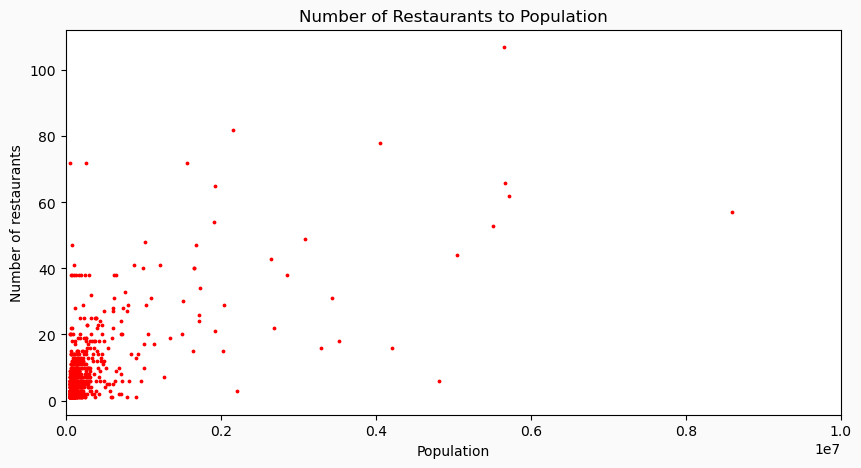

In [19]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_pop.plot(kind = "scatter", x = "population", y = "number_of_restaurants", ax = ax, s = 3, color = "red")

ax.set_title("Number of Restaurants to Population")
ax.set_xlabel("Population")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e7)

Each red dot represents a city's data. From the diagram, we can clearly see that few fast-food restaurants exist in the less populated regions and the trend line is upward sloping. As the population increase, the restaurant number shows a trend of increasing.

(0.0, 10000.0)

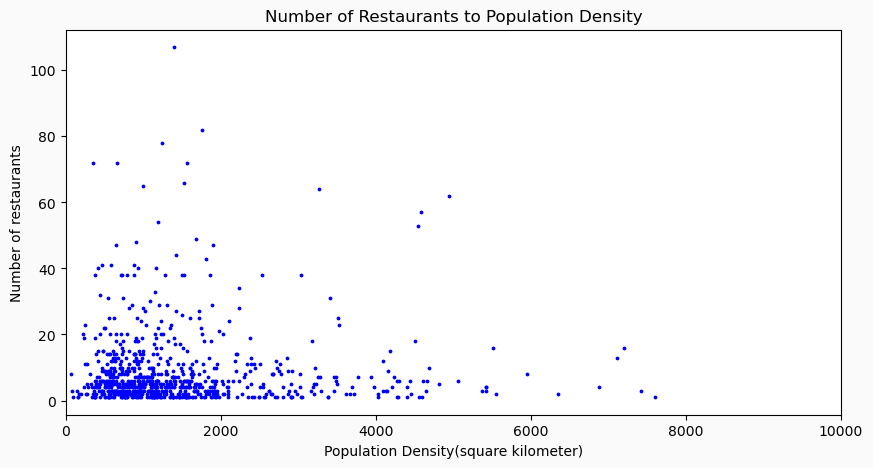

In [20]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_density.plot(kind = "scatter", x = "density", y = "number_of_restaurants", ax = ax, s = 3, color = "blue")

ax.set_title("Number of Restaurants to Population Density")
ax.set_xlabel("Population Density(square kilometer)")
ax.set_ylabel("Number of restaurants")

plt.xlim(0, 1e4)

The positions of dots in the diagram show no relationships between the population density and the number of fast food restaurants. Most cities with low population density have few restaurants, while the cities most loved by the fast-food industry are also not crowded.

(0.0, 100000.0)

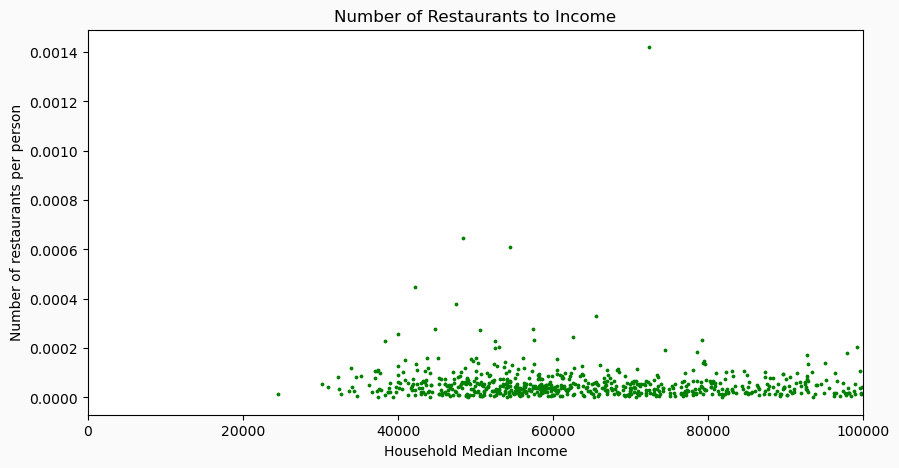

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income.plot(kind = "scatter", x = "income_household_median", y = "restaurant_population", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income")
ax.set_xlabel("Household Median Income")
ax.set_ylabel("Number of restaurants per person")

plt.xlim(0, 1e5)

The graph shows a quite ambiguous relationship between restaurant number and income. While cities with a higher number of fast-food restaurants per person appear more frequently in poorer regions, the difference is not large enough to see a clear trend. I guess the population might still have effects in the analysis, so I divide the cities into two groups with a benchmark of 70,000 population.

(0.0, 100000.0)

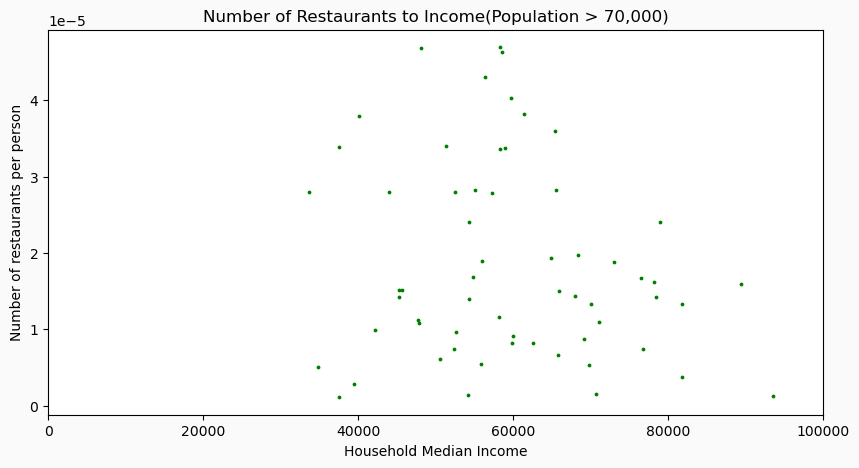

In [22]:
data_income2 = data_income[data_income.population > 700000]

fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income2.plot(kind = "scatter", x = "income_household_median", y = "restaurant_population", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income(Population > 70,000)")
ax.set_xlabel("Household Median Income")
ax.set_ylabel("Number of restaurants per person")

plt.xlim(0, 1e5)

(0.0, 100000.0)

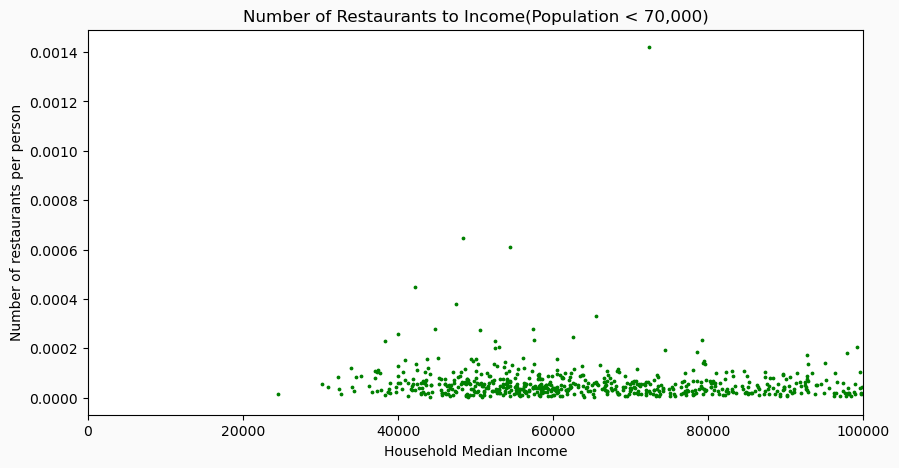

In [23]:
data_income3 = data_income[data_income.population < 700000]

fig, ax = plt.subplots(figsize = (10, 5))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
data_income3.plot(kind = "scatter", x = "income_household_median", y = "restaurant_population", ax = ax, s = 3, color = "green")

ax.set_title("Number of Restaurants to Income(Population < 70,000)")
ax.set_xlabel("Household Median Income")
ax.set_ylabel("Number of restaurants per person")

plt.xlim(0, 1e5)

Based on the result of the two diagrams above, it is almost certain that the population has caused the ambiguity. The first diagram is for cities with more than 70,000 people, which shows a negative relationship between the restaurant number and household income. Is it possible that income will be a factor only when the population is large enough?

To check the effects of existing restaurants, I choose to plot the bar chart of the three representative cities. The blue bar represents the number of restaurants of a specific brand beore 2016-4-3, and the orange bar represnts the number added after that date.

<AxesSubplot:title={'center':'Phoenix'}, xlabel="Restaurant's Name", ylabel='Number'>

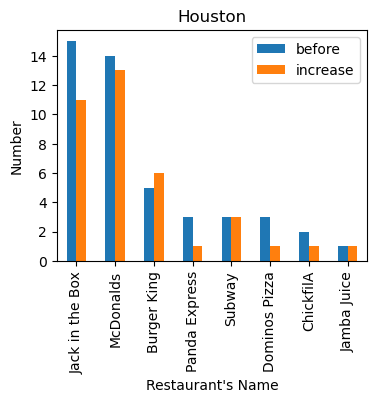

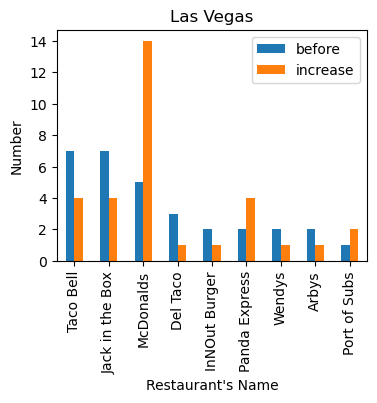

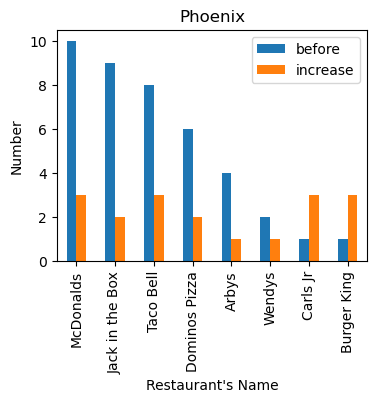

In [24]:
city_group = fastfood_data1.groupby("city")

def cityfunc (cityname):
    c = city_group.get_group(cityname)
    a = bdate(c, datetime(2016, 4, 3))
    b = adate(c, datetime(2016, 4, 3))
    d = pd.merge(a.name.value_counts().to_frame(), b.name.value_counts().to_frame()
                 , right_index=True, left_index=True)
    d = d.rename(columns = {"name_x": "before", "name_y": "increase"})
    return d


cityfunc("Houston").plot.bar(title = "Houston", figsize = (4, 3), xlabel = "Restaurant's Name", ylabel = "Number")
cityfunc("Las Vegas").plot.bar(title = "Las Vegas", figsize = (4, 3), xlabel = "Restaurant's Name", ylabel = "Number")
cityfunc("Phoenix").plot.bar(title = "Phoenix", figsize = (4, 3), xlabel = "Restaurant's Name", ylabel = "Number")

From the data in Las Vegas, we can see that the number of fast food restaurants greatly increased, especially McDonald's. In Phoenix, few new restaurants were established, given that several large brands already exist in the city. Houston's data shows trends different from the other two: the large brands opened more restaurants while they have already taken the major portion of the market. The only common part of these three graphs is that the small brands show no large increase in their restaurant number throughout the time period.

# Project Two

## 2.1 The Message

This project mainly wants to explore which factors attract fast-food restaurants to start their businesses. To find out the answer, I choose to use the existence of the relationship between the factors and the outcome to determine whether they are valid. One way to demonstrate relationships is to draw a trend line: upward-sloping refers to a positive relationship, downward for negative, and horizontal or vertical for no relationships.

(0.0, 120.0)

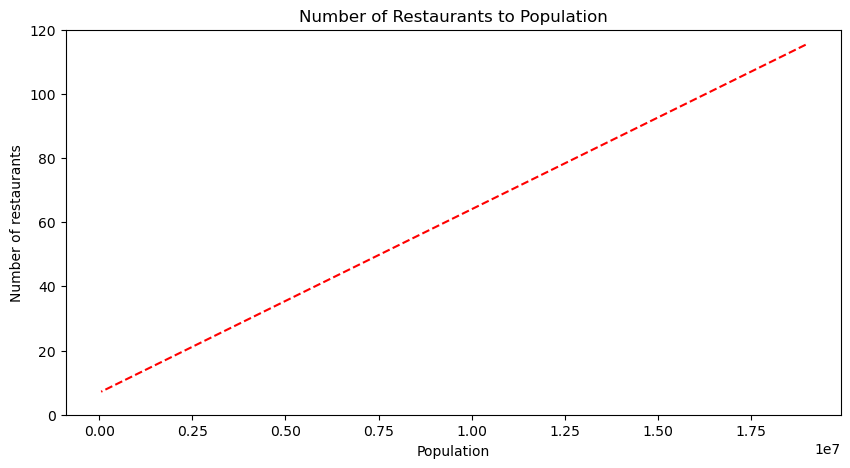

In [25]:
fig, ax = plt.subplots(figsize = (10, 5))

x = data_pop["population"]
y = data_pop["number_of_restaurants"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

ax.set_title("Number of Restaurants to Population")
ax.set_xlabel("Population")
ax.set_ylabel("Number of restaurants")

plt.ylim(0, 120)

(0.0, 120.0)

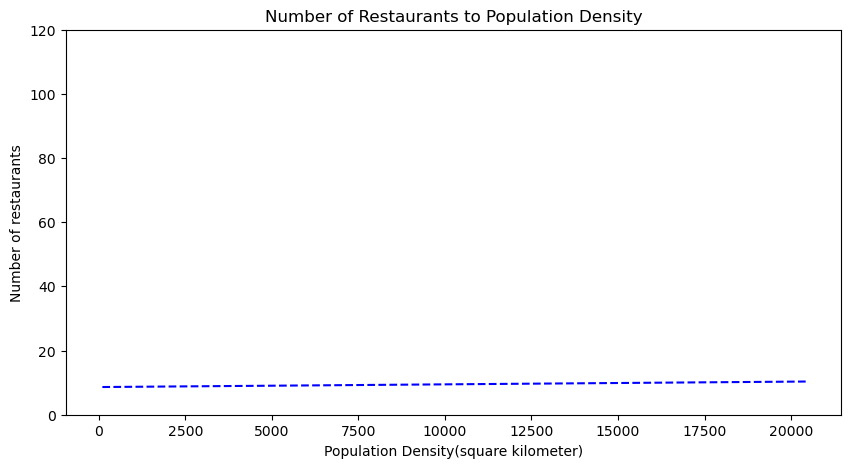

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))

x = data_density["density"]
y = data_density["number_of_restaurants"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"b--")

ax.set_title("Number of Restaurants to Population Density")
ax.set_xlabel("Population Density(square kilometer)")
ax.set_ylabel("Number of restaurants")

plt.ylim(0, 120)

(0.0, 4.1e-05)

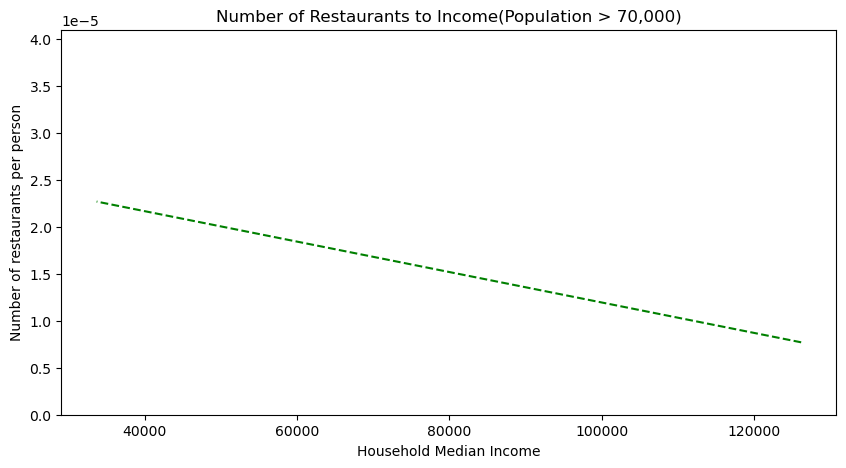

In [27]:
fig, ax = plt.subplots(figsize = (10, 5))

x = data_income2["income_household_median"]
y = data_income2["restaurant_population"]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"g--")

ax.set_title("Number of Restaurants to Income(Population > 70,000)")
ax.set_xlabel("Household Median Income")
ax.set_ylabel("Number of restaurants per person")

plt.ylim(0, 41e-6)

From the analysis in previous sections, I have already determined the relationships between three different variables and the number of restaurants. For population, the trend line shows a clear upward slope, indicating that fast-food restaurants favor cities with high populations. The population density line is roughly horizontal, meaning that it is not a related factor. According to my findings in the last part, to demonstrate the relationship, the income line should only for cities with a population higher than 70,000. The line is downward sloping and is flatter than the population line, showing that income is negatively related to restaurant number and the relationship is weaker than the population.

To find out the relationship between new restaurants and existing restaurants, I plotted this histogram to show when the canteens are recorded, which can be seen as the date that they were established.

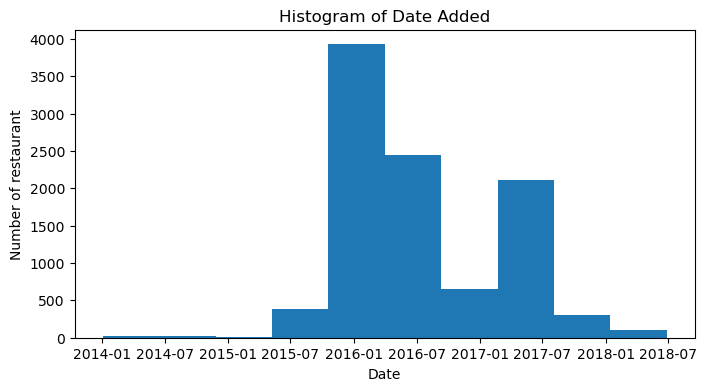

In [28]:
plt.figure(figsize = (8, 4))
plt.hist(fastfood_data1["dateAdded"])
plt.xlabel("Date")
plt.ylabel("Number of restaurant")
plt.title("Histogram of Date Added")
plt.show()

## 2.2 Maps and Interpretations

To further verify my conclusions, I decided to draw maps that demonstrate the distribution of fast-food restaurants across the United State. For the scale of the map, I prefer using states rather than cities: the table doesn’t guarantee to have all the cities’ data and the too-detailed map may add difficulties to the analysis. 

In [29]:
import geopandas as gpd
from shapely.geometry import Point
import string

In [30]:
fastfood_data3 = fastfood_data.drop(fastfood_data.columns[[0, 2, 3, 4, 6, 7, 11, 13, 14]], axis=1)
fastfood_data3.head(10)

,dateAdded,city,latitude,longitude,name,province
0,2015-10-19 23:47:58,Thibodaux,29.814697,-90.814742,SONIC Drive In,LA
1,2015-10-19 23:47:58,Thibodaux,29.814697,-90.814742,SONIC Drive In,LA
2,2016-03-29 05:06:36,Pigeon Forge,35.803788,-83.580553,Taco Bell,TN
3,2017-01-03 07:46:11,Pigeon Forge,35.782339,-83.551408,Arbys,TN
4,2018-06-26 02:59:43,Morrow,33.562738,-84.321143,Steak n Shake,GA
5,2015-10-23 23:59:49,Detroit,42.368823,-83.138251,Wendys,MI
6,2015-09-21 07:47:08,Detroit,42.416819,-83.180444,Burger King,MI
7,2016-06-06 16:15:08,Oceanside,33.205722,-117.288645,Chipotle Mexican Grill,CA
8,2016-12-13 12:34:52,Riverhead,40.937359,-72.650142,7Eleven,NY
9,2016-04-16 16:20:41,Monahans,31.580721,-102.891455,Dairy Queen,TX


Text(0.5, 1.0, 'Plot the Restaurants')

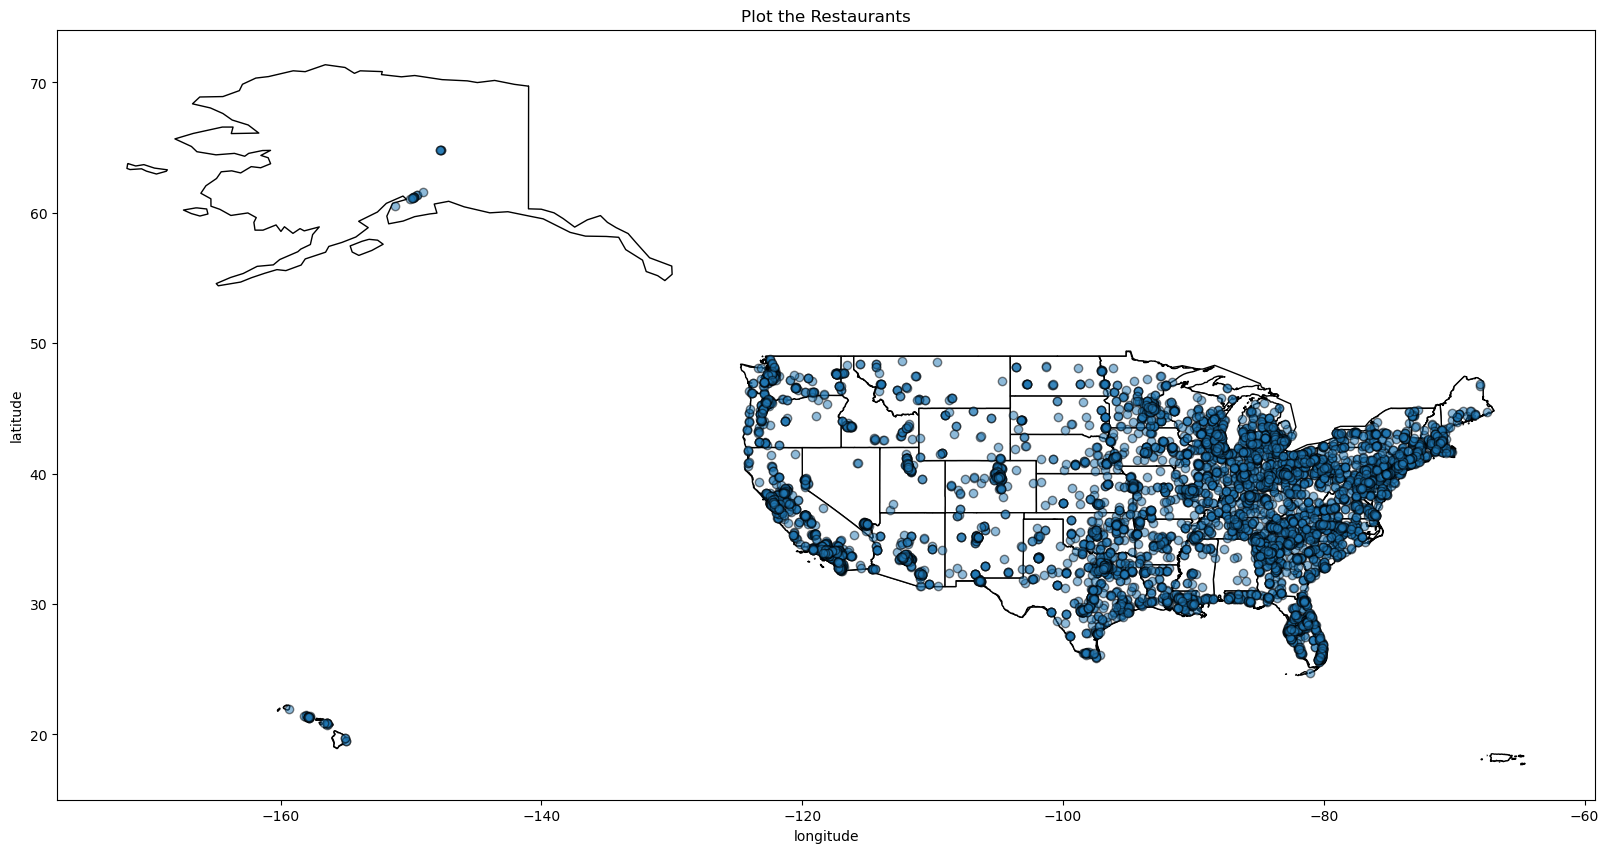

In [31]:
fastfood_data3['Coordinates'] = list(zip(fastfood_data3.longitude, fastfood_data3.latitude))
fastfood_data3['Coordinates'] = fastfood_data3['Coordinates'].apply(Point)
gfd = gpd.GeoDataFrame(fastfood_data3, geometry= 'Coordinates')

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, gax = plt.subplots(figsize=(20,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df = state_df.drop([1, 51, 52, 53])
state_df.plot(ax=gax, edgecolor="black", color="white")

gfd.plot(ax = gax, edgecolor='black', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Plot the Restaurants')

In [32]:
stateList = fastfood_data3.province.value_counts()
state_data = stateList.to_frame()
state_data = state_data.reset_index()
state_data = state_data.rename(columns = {"index": "STUSPS", "province": "number_of_restaurants"})
state_data = state_data.set_index("STUSPS")
state_data.head(10)

,number_of_restaurants
STUSPS,
CA,1201
TX,811
FL,621
OH,522
GA,420
IL,405
PA,383
MI,374
NY,352


Text(0.5, 1.0, 'Distribution of Restaurants')

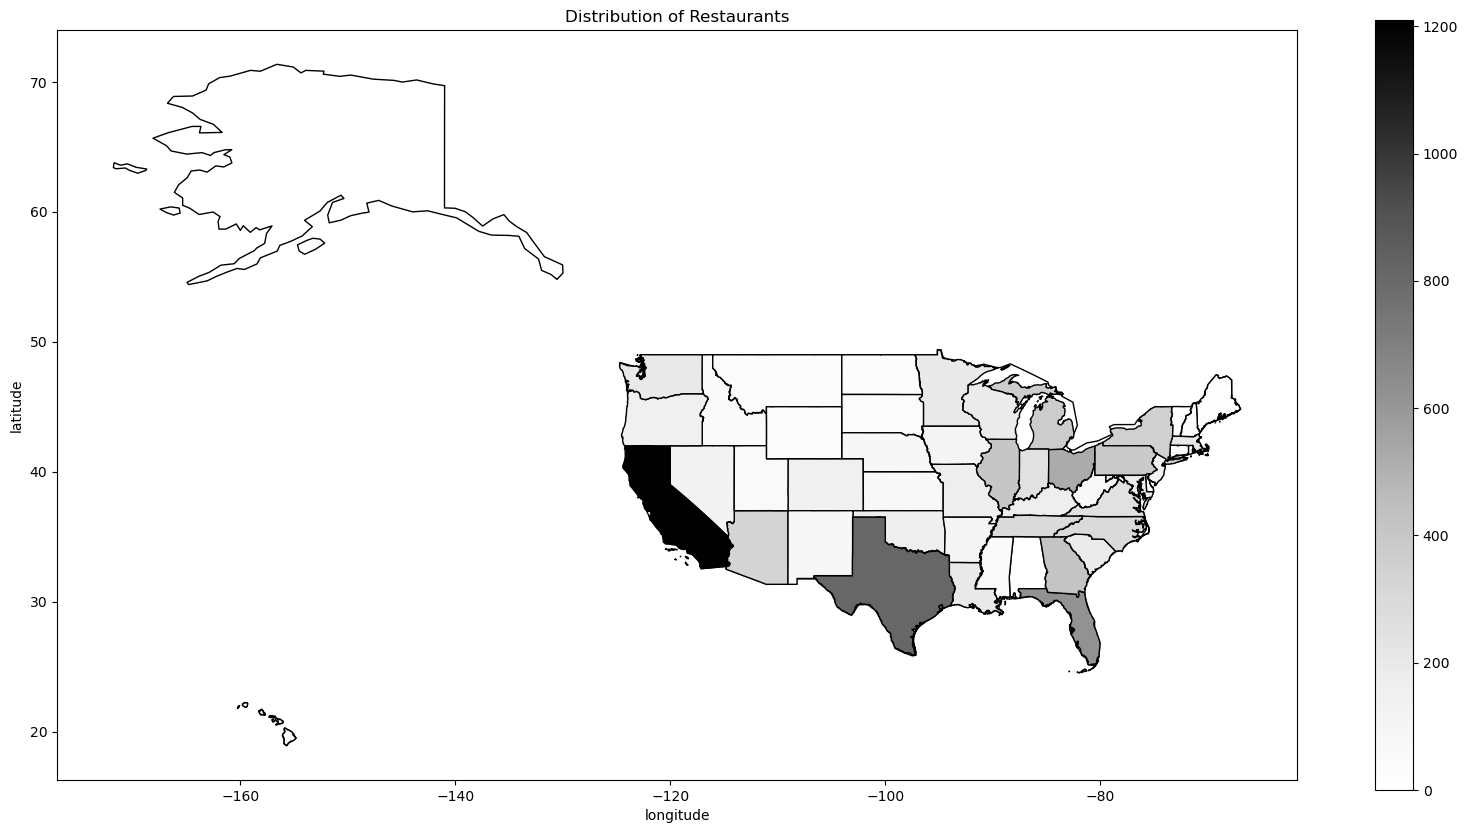

In [33]:
fig, gax = plt.subplots(figsize=(20,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


state_df1 = pd.merge(state_df, state_data, on = "STUSPS", how = "inner")
state_df1.plot(
    ax=gax, edgecolor='black', column='number_of_restaurants', legend=True, cmap='Greys',
    vmin=0, vmax=1210
)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Distribution of Restaurants')

Firstly, I plot a graph showing each fast-food restaurant's exact location. The result is shown above. Unfortunately, this graph is invalid for analysis as the dots overlap with each other, making it impossible to distinguish the differences between states that have a large number of restaurants.

Then I decided to use color to represent the number of restaurants in each state. The darker the color is, the more fast-food canteens exist in that state.

### Merging with a New Dataset

To find out the median income and population of each state, I imported new datasets from United State Census Bureau. The two new tables each record the median income and population in each state of the United States.

Population: https://data.census.gov/tableq=population+by+state&g=0400000US10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56,72,05,02,08,01,06,09,04&tid=PEPPOP2019.PEPANNRES

Income: https://data.census.gov/tableq=S1901:+INCOME+IN+THE+PAST+12+MONTHS(IN+2018+INFLATIONADJUSTED+DOLLARS)&g=0400000US10,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56,72,05,02,08,01,06,09,04&tid=ACSST1Y2021.S1901&moe=false&tp=true

In [34]:
pop_data_state = pd.read_csv('PEPPOP2019.PEPANNRES-2023-02-28T201127.csv')
pop_data_state = pop_data_state.rename(columns = {"Geographic Area Name": "NAME"})
pop_data_state = pop_data_state.set_index("NAME")
pop_data_state["Population"] = pop_data_state["Population"].astype('int')
pop_data_state = pop_data_state.sort_values(by = ["Population"], ascending=False)
pop_data_state.head(10)

,Population
NAME,
California,39512223
Texas,28995881
Florida,21477737
New York,19453561
Pennsylvania,12801989
Illinois,12671821
Ohio,11689100
Georgia,10617423
North Carolina,10488084


In [35]:
state_df2 = pd.merge(state_df, pop_data_state, on = "NAME", how = "inner")

Population data and the state map are merged together, and get the range of population: 0 to 40,000,000.

In [36]:
income_data_state = pd.read_csv('ACSST1Y2021.S1901-2023-03-01T024229.csv')
income_data_state = income_data_state.rename(columns = {"Geographic Area Name": "NAME"})
income_data_state = income_data_state.set_index("NAME")
income_data_state = income_data_state.sort_values(by = ["Median income"], ascending=False)
income_data_state.head(10)

,Median income
NAME,
Maryland,90203
Massachusetts,89645
New Jersey,89296
New Hampshire,88465
California,84907
Hawaii,84857
Washington,84247
Connecticut,83771
Colorado,82254


In [37]:
income_data_state1 = income_data_state.sort_values(by = ["Median income"], ascending=True)
income_data_state1.head(10)

,Median income
NAME,
Puerto Rico,22237
Mississippi,48716
West Virginia,51248
Louisiana,52087
Arkansas,52528
Alabama,53913
New Mexico,53992
Kentucky,55573
Oklahoma,55826


In [38]:
state_df6 = pd.merge(state_df, income_data_state, on = "NAME", how = "inner")

Income data and the state map are merged together, and get the range of median income: 20,000 to 100,000.

### Mapping

Then draw a map showing how the population is distributed across the United States.

Text(0.5, 1.0, 'Population')

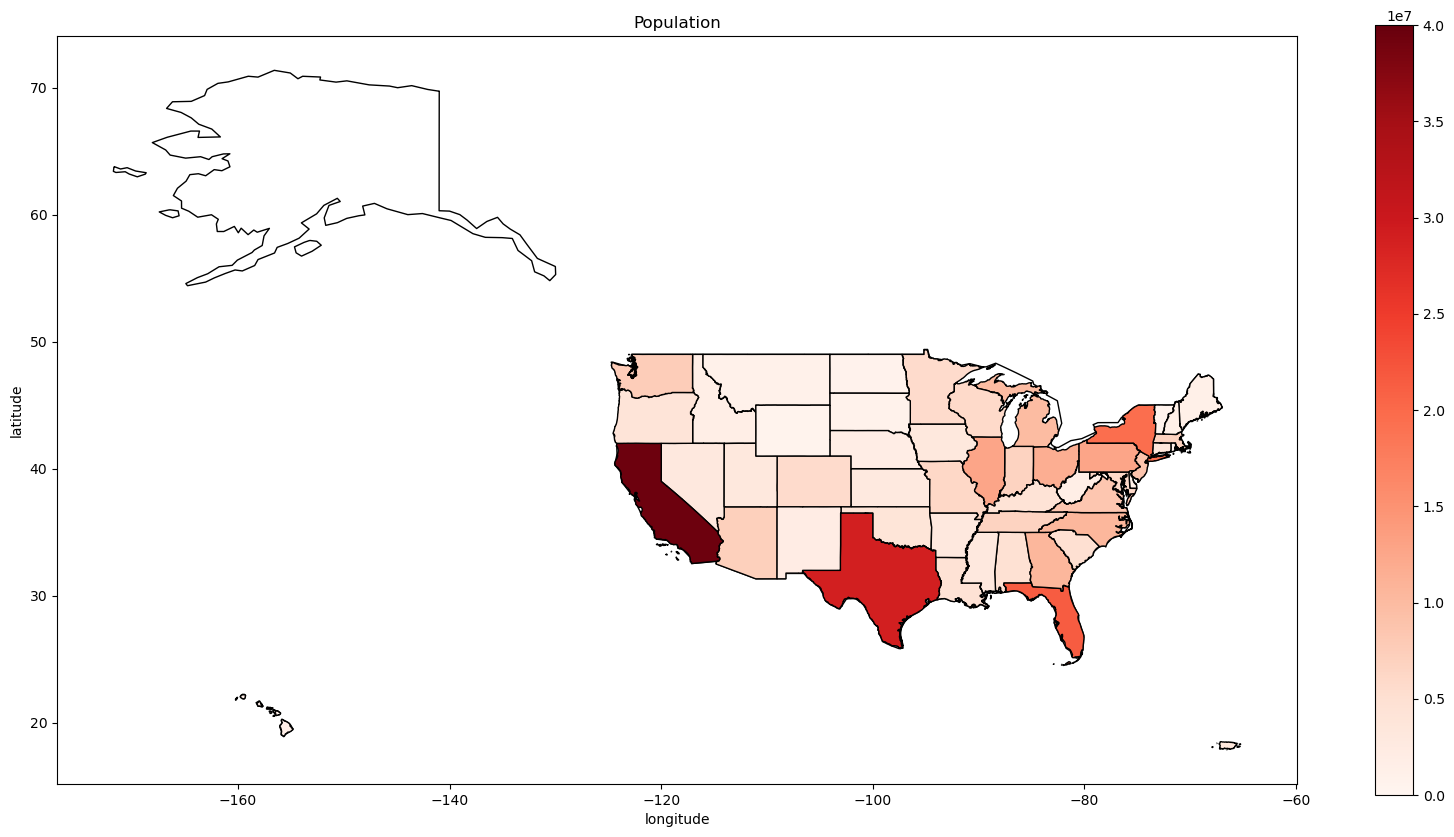

In [39]:
fig, gax = plt.subplots(figsize=(20,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

state_df2.plot(
    ax=gax, edgecolor='black', column='Population', legend=True, cmap='Reds',
    vmin=0, vmax=40000000
)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Population')

The result demonstrates very high accordance with the map of restaurant numbers: the densities of color are almost the same in the two maps.

Next is to draw the income map.

Text(0.5, 1.0, 'Median Income')

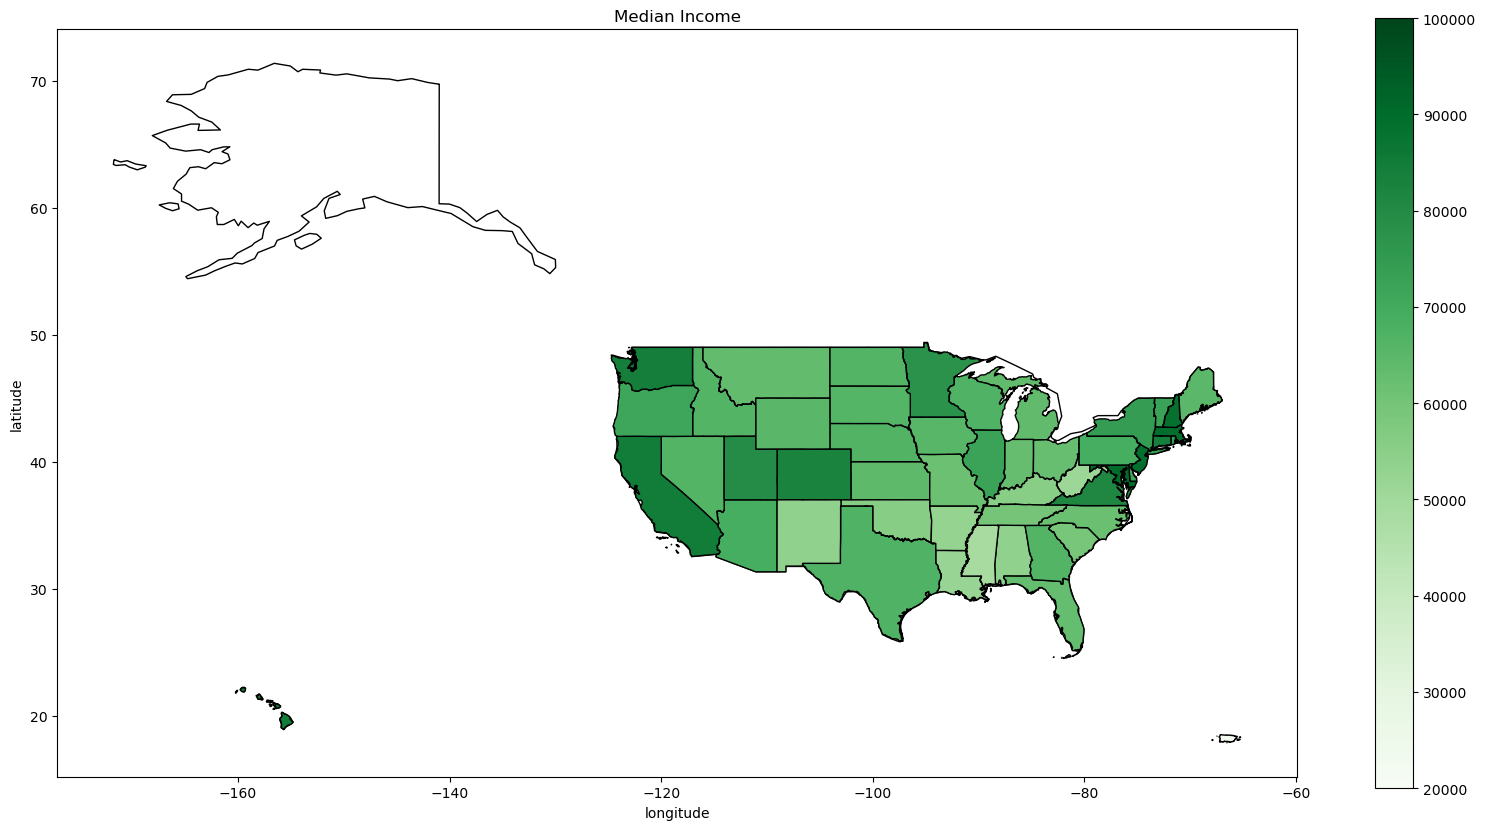

In [40]:
fig, gax = plt.subplots(figsize=(20,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

state_df6.plot(
    ax=gax, edgecolor='black', column='Median income', legend=True, cmap='Greens',
    vmin=20000, vmax=100000
)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Median Income')

In [41]:
income_pop_data = pd.merge(income_data_state, pop_data_state, on = "NAME", how = "inner")
income_pop_data = income_pop_data[income_pop_data.Population > 5000000]

Text(0.5, 1.0, 'Median Income(For States That Population > 5000000)')

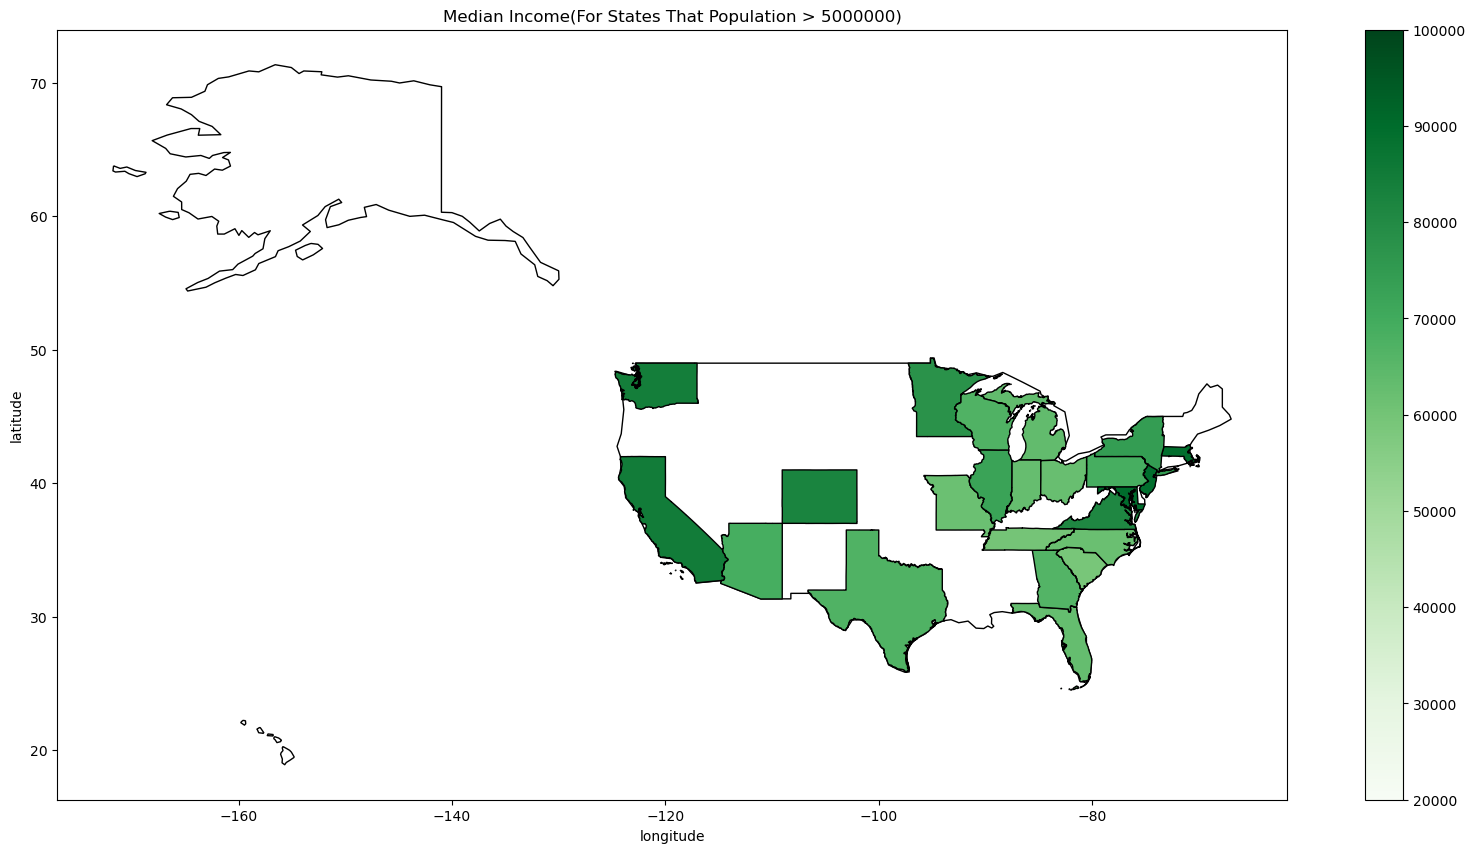

In [42]:
fig, gax = plt.subplots(figsize=(20,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


state_df3 = pd.merge(state_df, income_pop_data, on = "NAME", how = "inner")
state_df3.plot(
    ax=gax, edgecolor='black', column='Median income', legend=True, cmap='Greens',
    vmin=20000, vmax=100000
)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Median Income(For States That Population > 5000000)')

Alike the results I get from previous graphs, the distribution of median income across America demonstrates no direct relationship with the restaurant number. So, I made a similar choice as before and only kept the states with a population higher than 5000,000. Now, the same conclusion can be drawn. In the second graph, we can see that Minnesota, Colorado, Washington, and the states on the east coast showed a high median income level, while their colors in the restaurant map are relatively lighter. In contrast, states like Texas and Florida have relatively lower incomes and darker colors on the restaurant map.

Since the population density has been proven to be irrelevant to the restaurant number, I decided not to visualize it on a map. For the next variable, the number of existing restaurants, I used the benchmark mentioned previously and drew two maps, one showing the number before 2016-4-3, and another showing the number added after that.

In [43]:
dateBefore2 = bdate(fastfood_data3, datetime(2016, 4, 3))
dateAfter2 = adate(fastfood_data3, datetime(2016, 4, 3))

stateList1 = dateBefore2.province.value_counts()
state_data1 = stateList1.to_frame()
state_data1 = state_data1.reset_index()
state_data1 = state_data1.rename(columns = {"index": "STUSPS", "province": "number_of_restaurants"})
state_data1 = state_data1.set_index("STUSPS")

state_data1.head(10)

,number_of_restaurants
STUSPS,
CA,775
TX,449
FL,318
OH,228
IL,201
AZ,198
GA,190
MI,187
TN,151


Text(0.5, 1.0, 'Restaurant Distribution Before 2016-4-3')

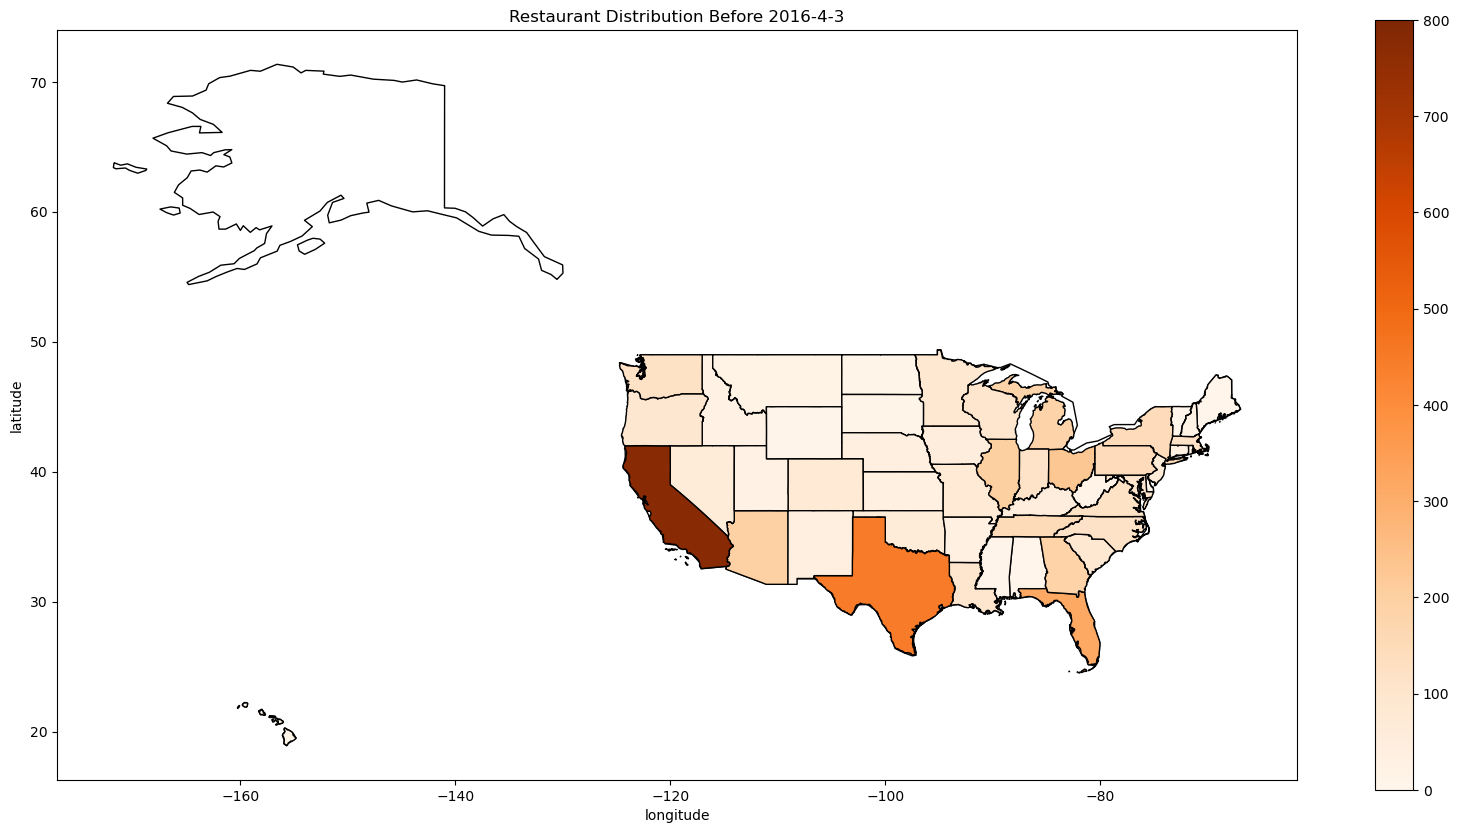

In [44]:
fig, gax = plt.subplots(figsize=(20,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


state_df4 = pd.merge(state_df, state_data1, on = "STUSPS", how = "inner")
state_df4.plot(
    ax=gax, edgecolor='black', column='number_of_restaurants', legend=True, cmap='Oranges',
    vmin=0, vmax=800
)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Restaurant Distribution Before 2016-4-3')

In [45]:
stateList2 = dateAfter2.province.value_counts()
state_data2 = stateList2.to_frame()
state_data2 = state_data2.reset_index()
state_data2 = state_data2.rename(columns = {"index": "STUSPS", "province": "number_of_restaurants"})
state_data2 = state_data2.set_index("STUSPS")

state_data2.head(10)

,number_of_restaurants
STUSPS,
CA,426
TX,362
FL,303
OH,294
PA,238
GA,230
NY,208
IL,204
MI,187


Text(0.5, 1.0, 'Restaurant Increased After 2016-4-3')

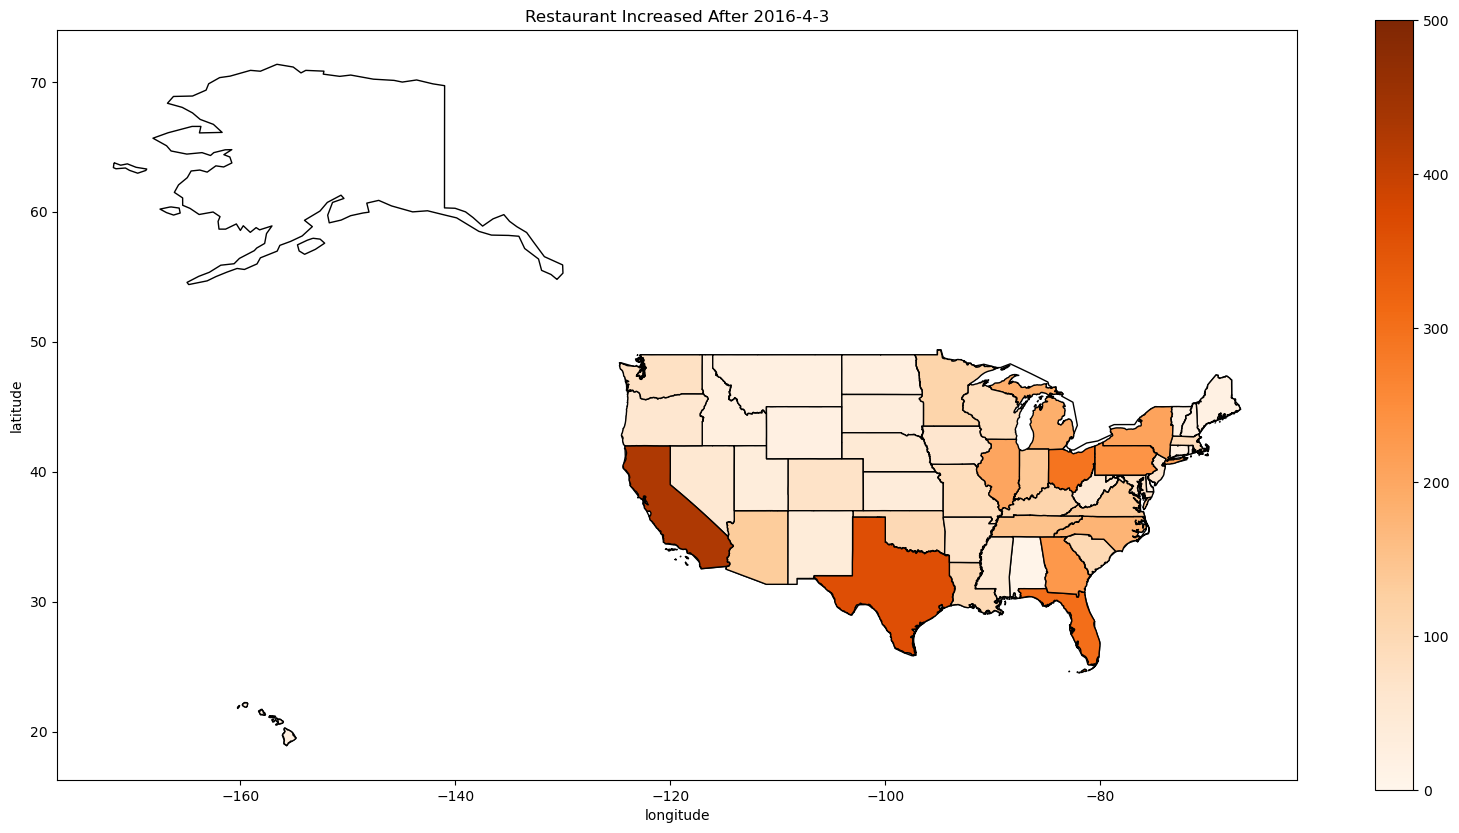

In [46]:
fig, gax = plt.subplots(figsize=(20,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


state_df5 = pd.merge(state_df, state_data2, on = "STUSPS", how = "inner")
state_df5.plot(
    ax=gax, edgecolor='black', column='number_of_restaurants', legend=True, cmap='Oranges',
    vmin=0, vmax=500
)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Restaurant Increased After 2016-4-3')

The result is opposite to my hypothesis, revealing that the fast-food industry still favors the cities that are already crowded with competitors. For the two maps above, the color of each state are very similar, and, like map of total number of restaurants, are in accordance to the population.

Concerning the truth told by data, I guess this phenomenon results from the unsaturated market. The cities that already have many fast-food restaurants are the most flourishing ones across the country: they have high populations and citizens within all income levels. In the perfectly competitive model, when the markets prove themselves to be profitable, they become attractive to all firms in the industry. Since this trend only stops when the economic profit goes to zero, from the fact that firms keep entering, it is reasonable to deduce that the market is still profitable, and firms always prefer these existing profitable markets. As a result, in the current stage, the more canteens exist, the more attractive the city is to new fast-food restaurants.

The final variable is the brand of existing restaurants. To test my hypothesis, I choose to plot a map showing the number of restaurants of the three largest fast-food brands.

In [47]:
fastfood_data5 = fastfood_data.groupby('name')

def statefunc(name):
    df = fastfood_data5.get_group(name)
    df = df.drop(df.columns[[0, 2, 3, 4, 6, 7, 8, 9, 11, 13, 14]], axis=1)
    df = bdate(df, datetime(2016, 4, 3))
    stateList3 = df.province.value_counts()
    state_data3 = stateList3.to_frame()
    state_data3 = state_data3.reset_index()
    state_data3 = state_data3.rename(columns = {"index": "STUSPS", "province": "number_of_restaurants" + name})
    state_data3 = state_data3.set_index("STUSPS")
    return state_data3

fastfood_data_m = statefunc('McDonalds')
fastfood_data_t = statefunc('Taco Bell')
fastfood_data_b = statefunc('Burger King')

state_df7 = pd.merge(state_df, fastfood_data_m, on = "STUSPS", how = "inner")
state_df8 = pd.merge(state_df7, fastfood_data_t, on = "STUSPS", how = "inner")
state_df9 = pd.merge(state_df8, fastfood_data_b, on = "STUSPS", how = "inner")
state_df9["number_of_restaurants"] = state_df9["number_of_restaurantsMcDonalds"] + state_df9["number_of_restaurantsTaco Bell"] + state_df9["number_of_restaurantsBurger King"]

Text(0.5, 1.0, 'Three Most Famous Restaurants Distribution Before 2016-4-3')

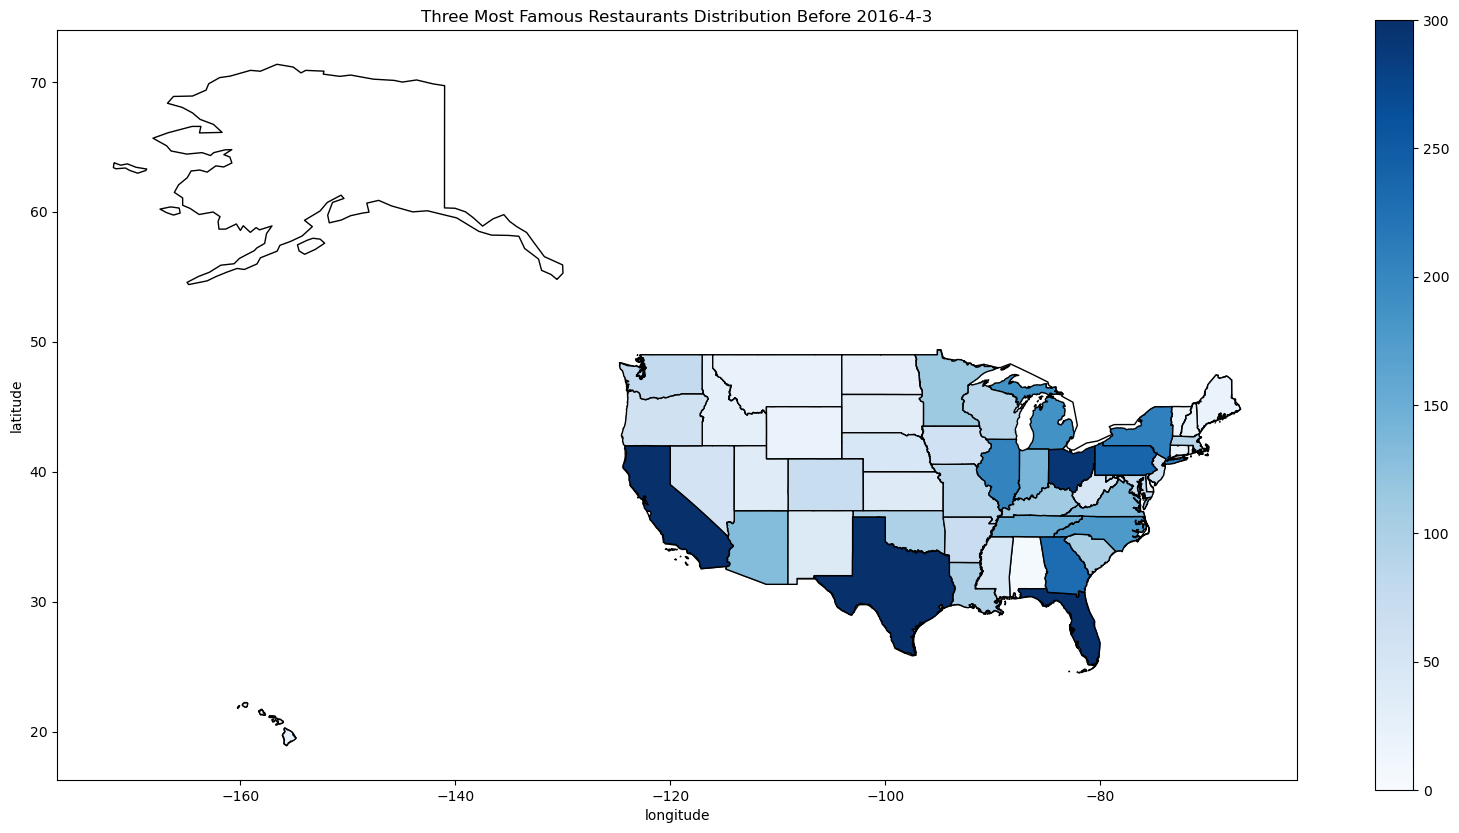

In [48]:
fig, gax = plt.subplots(figsize=(20,10))
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')


state_df5 = pd.merge(state_df, state_data2, on = "STUSPS", how = "inner")
state_df5.plot(
    ax=gax, edgecolor='black', column='number_of_restaurants', legend=True, cmap='Blues',
    vmin=0, vmax=300
)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Three Most Famous Restaurants Distribution Before 2016-4-3')

After plotting this map, I surprisingly find out that the number of new restaurants shows an even higher accordance with the distribution of the famous brands than the overall data. This indicates that the new entries prefer pursuing the footstep of the leaders in the industry, instead of avoiding competing with them. Such a finding contradicts my hypothesis and reveals that the existence of famous brands will encourage more fast-food restaurants to enter.

## 2.3 Conclusion

The investigations above can draw conclusions about the relationships between all independent variables and the outcome. 

Firstly, the population is positively related to the number of fast-food restaurants in the market: a high population leads to high demand for things, which can always attract firms to enter the local market. 

Secondly, income is negatively related to the restaurant number. However, this conclusion is somehow weak: the relationship only exists among cities with large enough populations, and the deviation between the scatter points are quite large.

Data shows that population density is irrelevant to the outcome, as the scatter point is almost random and the trend line is horizontal.

Mapping gives a clear view of how the last two variables affect the outcome, demonstrating the fact that the more fast-food restaurants choose to locate themselves in cities already crowded with many competitors. Moreover, the number of large-brand restaurants shows a higher positive relationship with the dependent variable. Such phenomena could result from the situation that markets in those cities have unsatisfied demand and are still highly profitable.